

Лабораторная работа 3. Использование механизмов внимания в нейронных сетях.

Выполнил: Очередько А.Н.

Группа: ББМО-01-23


Реализация задания:


In [1]:
!pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.6 MB/s eta 0:00:00


In [3]:
# Автоматическая перезагрузка модулей при изменениях
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

# Получаем количество доступных GPU
_, available_gpus = num_of_gpus()
print(f"TensorFlow обнаружил {available_gpus} GPU устройства.")



TensorFlow обнаружил 1 GPU устройства.


In [13]:
from tensorflow.keras.applications import VGG16 as PretrainedModel

# Создаем экземпляр модели VGG16 с предобученными весами
model_instance = PretrainedModel(weights='imagenet', include_top=True)

# Печатаем архитектуру модели с подробностями
print("Модель VGG16 с ImageNet весами:")
model_instance.summary()



Модель VGG16 с ImageNet весами:


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

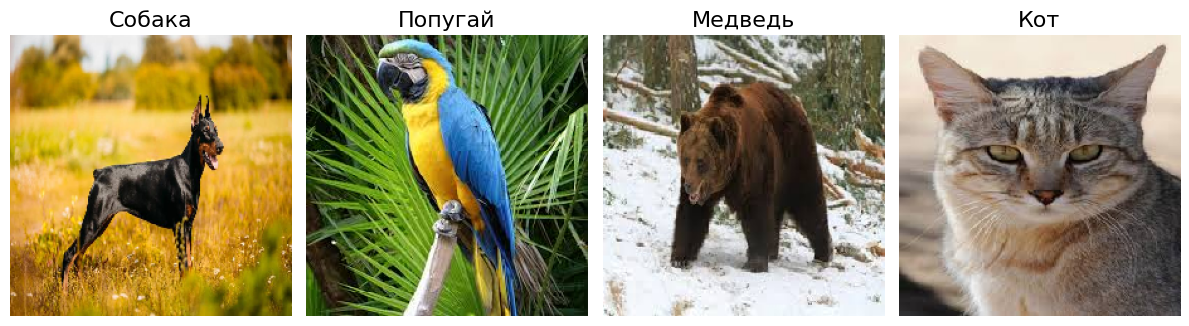

In [14]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input

# Список заголовков изображений
image_labels = ['Собака', 'Попугай', 'Медведь', 'Кот']

# Загружаем и подгоняем изображения под размер VGG16
image_1 = load_img('/dog.jpg', target_size=(224, 224))
image_2 = load_img('/po.jpg', target_size=(224, 224))
image_3 = load_img('/med.jpg', target_size=(224, 224))
image_4 = load_img('/cat.jpg', target_size=(224, 224))

# Преобразуем изображения в массив Numpy
image_array = np.asarray([np.array(image_1), np.array(image_2), np.array(image_3), np.array(image_4)])

# Применяем предварительную обработку для модели VGG16
preprocessed_images = preprocess_input(image_array)

# Отображаем изображения с заголовками
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for idx, label in enumerate(image_labels):
    axes[idx].imshow(image_array[idx])
    axes[idx].set_title(label, fontsize=16)
    axes[idx].axis('off')
plt.tight_layout()
plt.show()


In [15]:
import os
print(os.getcwd())

/content


In [16]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

# Инициализация объекта для замены последнего слоя на линейную активацию
linear_activation_modifier = ReplaceToLinear()

def modify_model_activation(model_clone):
    # Заменяем активацию последнего слоя на линейную
    model_clone.layers[-1].activation = tf.keras.activations.linear


In [17]:
from tf_keras_vis.utils.scores import CategoricalScore

# Определение оценки для классов
category_scores = CategoricalScore([285, 277, 330, 675])
# 277 - Попугай, 285 - Собака, 330 - Медведь, 675 - Кот

# Создаём функцию оценки
def custom_score_function(model_output):
    # Входная переменная `model_output` представляет собой выходы модели
    # и имеет размерность (номер примера, номер класса)
    return (model_output[0][285], model_output[1][277], model_output[2][330], model_output[3][675])


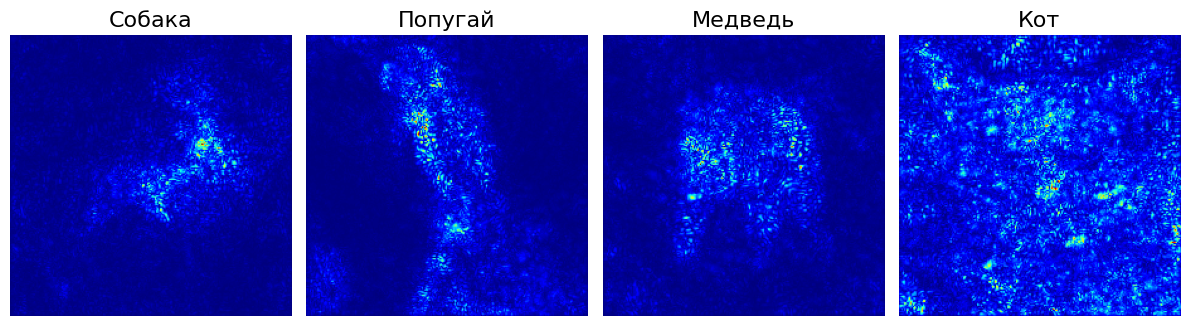

CPU times: user 4.11 s, sys: 991 ms, total: 5.1 s
Wall time: 6.12 s


In [19]:
%%time
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency

# Создаём объект для вычисления карты внимания
saliency_map_generator = Saliency(model,
                                  model_modifier=linear_activation_modifier,
                                  clone=True)

# Генерируем карту внимания с использованием пользовательской функции оценки
saliency_maps = saliency_map_generator(custom_score_function, preprocessed_images)

# Отображаем карты внимания
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for idx, label in enumerate(image_labels):
    axes[idx].set_title(label, fontsize=16)
    axes[idx].imshow(saliency_maps[idx], cmap='jet')
    axes[idx].axis('off')
plt.tight_layout()
plt.show()


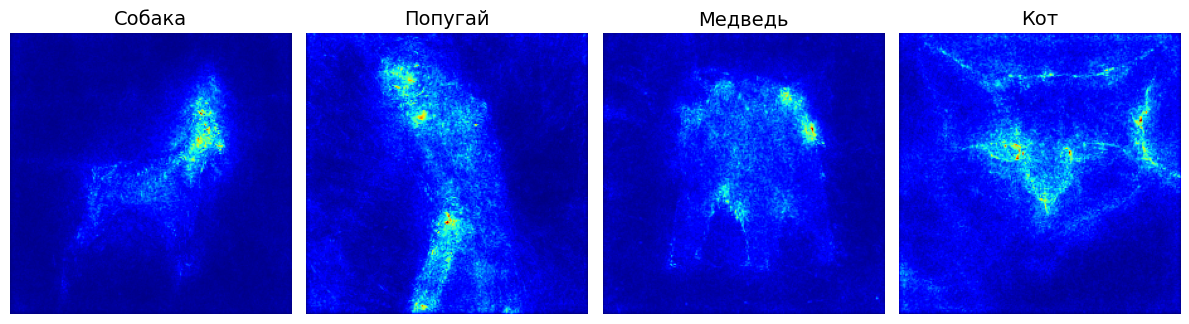

CPU times: user 2.84 s, sys: 181 ms, total: 3.02 s
Wall time: 3.86 s


In [20]:
%%time

# Генерируем карту внимания со сглаживанием, уменьшающим шум за счет добавления шума
saliency_map_with_smoothing = saliency_map_generator(custom_score_function,
                                                     preprocessed_images,
                                                     smooth_samples=20,  # Количество итераций расчета градиентов
                                                     smooth_noise=0.20)   # Уровень распространения шума

# Отображаем карты внимания
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for idx, label in enumerate(image_labels):
    axes[idx].set_title(label, fontsize=14)
    axes[idx].imshow(saliency_map_with_smoothing[idx], cmap='jet')
    axes[idx].axis('off')
plt.tight_layout()
plt.savefig('smoothgrad.png')
plt.show()


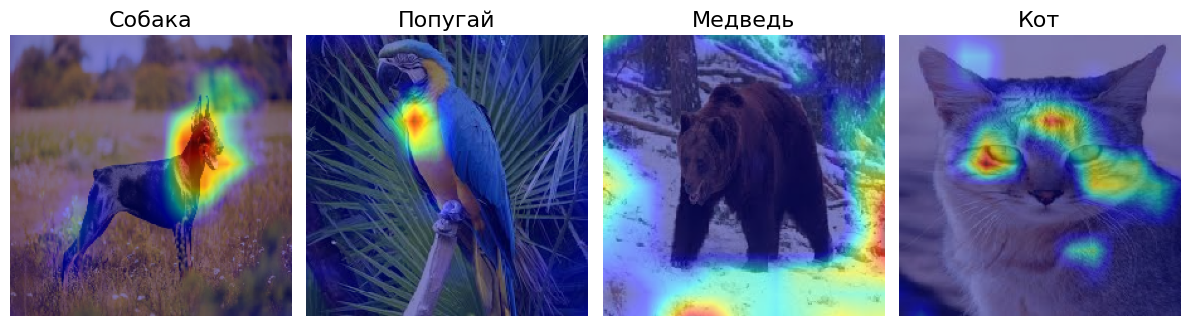

CPU times: user 1.6 s, sys: 983 ms, total: 2.58 s
Wall time: 2.64 s


In [21]:
%%time

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Создаём объект для визуализации GradCAM
gradcam_visualizer = Gradcam(model,
                             model_modifier=linear_activation_modifier,
                             clone=True)

# Генерируем тепловую карту с помощью GradCAM
gradcam_heatmap = gradcam_visualizer(custom_score_function,
                                     preprocessed_images,
                                     penultimate_layer=-1)

# Отображаем тепловые карты
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for idx, label in enumerate(image_labels):
    heatmap = np.uint8(cm.jet(gradcam_heatmap[idx])[..., :4] * 255)  # Преобразуем в 8-битный формат
    axes[idx].set_title(label, fontsize=16)
    axes[idx].imshow(image_array[idx])  # Отображаем исходное изображение
    axes[idx].imshow(heatmap, cmap='jet', alpha=0.5)  # Накладываем тепловую карту
    axes[idx].axis('off')
plt.tight_layout()
plt.show()


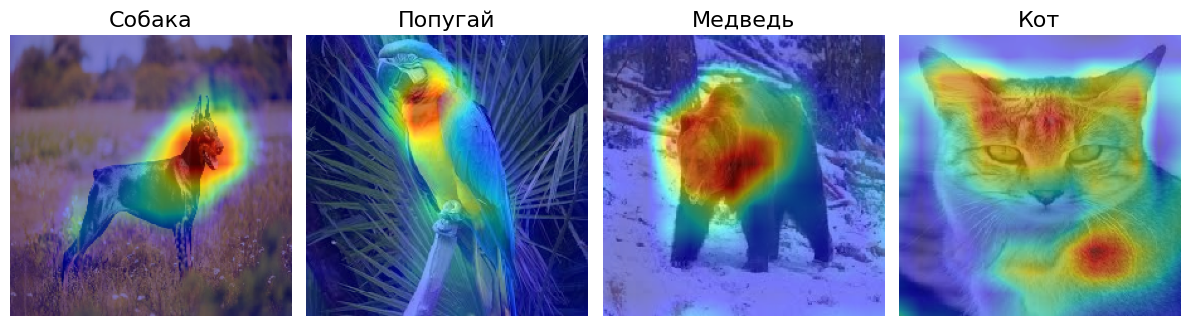

CPU times: user 1.74 s, sys: 817 ms, total: 2.56 s
Wall time: 2.47 s


In [23]:
%%time

from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus

# Создаём объект для визуализации GradCAM++
gradcam_plus_plus_visualizer = GradcamPlusPlus(model,
                                              model_modifier=linear_activation_modifier,
                                              clone=True)

# Генерируем тепловую карту с помощью GradCAM++
gradcam_plus_plus_heatmap = gradcam_plus_plus_visualizer(custom_score_function,
                                                        preprocessed_images,
                                                        penultimate_layer=-1)

# Визуализируем тепловые карты
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for idx, label in enumerate(image_labels):
    heatmap = np.uint8(cm.jet(gradcam_plus_plus_heatmap[idx])[..., :4] * 255)  # Преобразуем в 8-битный формат
    axes[idx].set_title(label, fontsize=16)
    axes[idx].imshow(image_array[idx])  # Отображаем исходное изображение
    axes[idx].imshow(heatmap, cmap='jet', alpha=0.5)  # Накладываем тепловую карту
    axes[idx].axis('off')
plt.tight_layout()
plt.savefig('gradcam_plus_plus.png')
plt.show()



Вывод:

В ходе работы были успешно применены различные методы визуализации для анализа внутреннего механизма нейронной сети VGG16, использующейся для классификации изображений. Мы использовали:

Метод Saliency — для выделения значимых областей на изображениях, связанных с принятыми решениями сети.
GradCAM и GradCAM++ — для генерации тепловых карт, показывающих, какие части изображений наиболее важны для сети при принятии решения по классификации.
Каждая из карт внимания была визуализирована и наложена на оригинальные изображения с использованием методов сглаживания для уменьшения шума и улучшения восприятия. В результате удалось получить наглядные тепловые карты для различных классов изображений (собака, попугай, медведь, кот).

Работа продемонстрировала, как можно использовать такие методы для объяснения решений глубокой нейронной сети и лучше понять, как модель взаимодействует с визуальной информацией.







